In [32]:
#Import libraries

#data handling
import pandas as pd
import numpy as np
import math
import time

#use of geolocation API
import requests
import json
import http.client
import urllib.parse

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import and analysis 

## order dataset

In [33]:
df_order = pd.read_csv('data/olist_orders_dataset.csv')
display(df_order.head())

#Analysis of order dataset
#shape
print(f'Shape of order dataset: {df_order.shape}')
print()
#Columns in dataset
print('Columns in order dataset:')
display(df_order.columns)
# datatypes
print('Data types in order dataset:')
display(df_order.dtypes)
# NAN Values
print('Number of NULL values in order dataset:')
display(df_order.isnull().sum())
#DUPLICATES
print(f'Number of duplicates in dataset: {df_order.duplicated().sum()}')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Shape of order dataset: (99441, 8)

Columns in order dataset:


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

Data types in order dataset:


order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Number of NULL values in order dataset:


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Number of duplicates in dataset: 0


In [34]:
# Problem: Handle NULL values in order dataset:
# Solution: Drop NAN values because NULL values can not be obtained from an external source

#drop NAN rows
df_order = df_order.dropna(how='any', axis=0)

# NAN Values
display(df_order.isnull().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [35]:
#Analyze column 'order_status' 

display(df_order['order_status'].value_counts())

#Filter order_status == 'delivered'
df_order = df_order[df_order['order_status'] == 'delivered']

#check filter by analysing order_status again
display(df_order['order_status'].value_counts())

#DROP oder_status == 'candeled' because casestudy will focus on delivered orders
#column is obsolete if value is just 'delivered'

df_order = df_order.drop(['order_status'], axis = 1)

delivered    96455
canceled         6
Name: order_status, dtype: int64

delivered    96455
Name: order_status, dtype: int64

## order_items dataset

In [36]:
#Import of order_items dataset
df_order_items = pd.read_csv('data/olist_order_items_dataset.csv')
display(df_order_items.head())

#Analysis of order_items dataset
#shape
print(f'Shape of order_items dataset: {df_order_items.shape}')
print()
#Columns in dataset
print('Columns in order_items dataset:')
display(df_order_items.columns)
# datatypes
print('Data types of order_items dataset:')
display(df_order_items.dtypes)
# NAN Values
print('Number of NULL values in order_items dataset:')
display(df_order_items.isnull().sum())
#DUPLICATES
print(f'Number of duplicates in order_items dataset: {df_order_items.duplicated().sum()}')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Shape of order_items dataset: (112650, 7)

Columns in order_items dataset:


Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

Data types of order_items dataset:


order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Number of NULL values in order_items dataset:


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Number of duplicates in order_items dataset: 0


In [37]:
#Merge order and order_items DataFrames
df_order_main = pd.merge(df_order, df_order_items, on = 'order_id', how = 'left')

# NAN Values in merged DataFrame
print('Number of NULL values in order_main dataset:')
display(df_order_main.isnull().sum())
#DUPLICATES
print(f'Number of duplicates in order_main dataset: {df_order_main.duplicated().sum()}')


Number of NULL values in order_main dataset:


order_id                         0
customer_id                      0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

Number of duplicates in order_main dataset: 0


## products dataset

In [38]:
#Import of products dataset
df_products = pd.read_csv('data/olist_products_dataset.csv')


#Analysis of products dataset
#shape
print(f'Shape of products dataset: {df_products.shape}')
print()
#Columns in dataset
print('Columns in products dataset:')
display(df_products.columns)
# datatypes
print('Data types of products dataset:')
display(df_products.dtypes)
# NAN Values
print('Number of NULL values in products dataset:')
display(df_products.isnull().sum())
#DUPLICATES
print(f'Number of duplicates in products dataset: {df_products.duplicated().sum()}')

Shape of products dataset: (32951, 9)

Columns in products dataset:


Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

Data types of products dataset:


product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

Number of NULL values in products dataset:


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Number of duplicates in products dataset: 0


In [39]:
# Problem: Handle NULL values in products dataset:
# Solution: Drop NAN values because NULL values can not be obtained from an external source

df_products_main = df_products.dropna(how = 'any', axis = 0)
display(df_products_main.isnull().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [40]:
#Merge df_order_main and df_products_main
df_order_product_main = pd.merge(df_order_main, df_products_main, on = 'product_id', how = 'left')

# NAN Values in merged DataFrame
print('Number of NULL values in order_products_main dataset:')
display(df_order_product_main.isnull().sum())
#DUPLICATES
print(f'Number of duplicates in order_products_main dataset: {df_order_product_main.duplicated().sum()}')

Number of NULL values in order_products_main dataset:


order_id                            0
customer_id                         0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1537
product_name_lenght              1537
product_description_lenght       1537
product_photos_qty               1537
product_weight_g                 1537
product_length_cm                1537
product_height_cm                1537
product_width_cm                 1537
dtype: int64

Number of duplicates in order_products_main dataset: 0


In [41]:
# Problem: Handle NULL values in products dataset (problem occures because of dropped products)
# Solution: Drop NAN values because NULL values can not be obtained from an external source

df_order_product_main = df_order_product_main.dropna(how = 'any', axis = 0)
print('Number of NULL values in order_products_main dataset:')
display(df_order_product_main.isnull().sum())

Number of NULL values in order_products_main dataset:


order_id                         0
customer_id                      0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [42]:
#The idea of this step is to group items of one order. At the moment there is one row for each item in every order.
#Grouping should be conducted just on order items. For example if a customer orders 3 items of Product A and 1 item of B
#the order should be grouped from 4 different rows into 2 where 1 row contains Product A with a item_count of 3 and 1 row for B
#why shouldn't the order be grouped as one? If Product A is a very small item which can be delivered on time without problems 
# and B is a very large product which causes problems in the delivery, there wouldn't be a differentiation if order is grouped as one

#Example: orders with more than one item
display(df_order_product_main[df_order_product_main['order_item_id'] > 2])

display(df_order_product_main[df_order_product_main['order_id'] == 'f930a1f6247ed00d6fa9d8a09782c7b4'])
display(df_order_product_main[df_order_product_main['order_id'] == '11c177c8e97725db2631073c19f07b62'])

#Group by order_id, customer_id and product_id

df_order_product_main_grouped = df_order_product_main.groupby(by = ['order_id', 'product_id', 'seller_id', 'customer_id']).agg(item_count = ('order_item_id','count'))
df_order_product_main_grouped = df_order_product_main_grouped.reset_index()

display(df_order_product_main_grouped[df_order_product_main_grouped['order_id'] == 'f930a1f6247ed00d6fa9d8a09782c7b4'])
display(df_order_product_main_grouped[df_order_product_main_grouped['order_id'] == '11c177c8e97725db2631073c19f07b62'])



,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
73,68e48e68da1f50f7c5838ea75e3a20dd,4afc1dcca5fe8926fc97d60a4497f8ab,2018-06-18 16:02:23,2018-06-18 17:00:57,2018-06-19 15:55:00,2018-06-22 21:18:51,2018-07-13 00:00:00,3,a659cb33082b851fb87a33af8f0fff29,817245bcc3badd82bbd222e0366951a6,...,84.9,13.25,automotivo,60.0,380.0,1.0,150.0,16.0,6.0,11.0
74,68e48e68da1f50f7c5838ea75e3a20dd,4afc1dcca5fe8926fc97d60a4497f8ab,2018-06-18 16:02:23,2018-06-18 17:00:57,2018-06-19 15:55:00,2018-06-22 21:18:51,2018-07-13 00:00:00,4,a659cb33082b851fb87a33af8f0fff29,817245bcc3badd82bbd222e0366951a6,...,84.9,13.25,automotivo,60.0,380.0,1.0,150.0,16.0,6.0,11.0
83,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,3,a5a0e71a81ae65aa335e71c06261e260,c8417879a15366a17c30af34c798c332,...,38.0,15.56,utilidades_domesticas,57.0,698.0,3.0,705.0,34.0,22.0,28.0
84,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,4,a5a0e71a81ae65aa335e71c06261e260,c8417879a15366a17c30af34c798c332,...,38.0,15.56,utilidades_domesticas,57.0,698.0,3.0,705.0,34.0,22.0,28.0
85,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,5,a5a0e71a81ae65aa335e71c06261e260,c8417879a15366a17c30af34c798c332,...,38.0,15.56,utilidades_domesticas,57.0,698.0,3.0,705.0,34.0,22.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110034,f930a1f6247ed00d6fa9d8a09782c7b4,4ab4db2f93c68d5914dc5eb566dc486c,2018-06-05 12:28:11,2018-06-05 14:31:34,2018-06-06 13:12:00,2018-06-07 17:28:31,2018-07-11 00:00:00,4,53759a2ecddad2bb87a079a1f1519f73,1f50f920176fa81dab994f9023523100,...,49.9,24.37,ferramentas_jardim,58.0,340.0,2.0,1500.0,30.0,22.0,30.0
110035,f930a1f6247ed00d6fa9d8a09782c7b4,4ab4db2f93c68d5914dc5eb566dc486c,2018-06-05 12:28:11,2018-06-05 14:31:34,2018-06-06 13:12:00,2018-06-07 17:28:31,2018-07-11 00:00:00,5,53759a2ecddad2bb87a079a1f1519f73,1f50f920176fa81dab994f9023523100,...,49.9,24.37,ferramentas_jardim,58.0,340.0,2.0,1500.0,30.0,22.0,30.0
110061,76931aa364051d5d57f6a23aa352956a,b477202dca6a3ad89828fdd5748dc849,2017-11-18 12:51:32,2017-11-18 13:06:23,2017-11-23 18:21:24,2017-11-27 14:55:45,2017-12-04 00:00:00,3,af16005fca813272caf59c432153949e,82e0a475a88cc9595229d8029273f045,...,75.9,9.35,moveis_decoracao,55.0,1186.0,2.0,800.0,53.0,8.0,20.0
110062,76931aa364051d5d57f6a23aa352956a,b477202dca6a3ad89828fdd5748dc849,2017-11-18 12:51:32,2017-11-18 13:06:23,2017-11-23 18:21:24,2017-11-27 14:55:45,2017-12-04 00:00:00,4,af16005fca813272caf59c432153949e,82e0a475a88cc9595229d8029273f045,...,75.9,9.35,moveis_decoracao,55.0,1186.0,2.0,800.0,53.0,8.0,20.0


,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
110031,f930a1f6247ed00d6fa9d8a09782c7b4,4ab4db2f93c68d5914dc5eb566dc486c,2018-06-05 12:28:11,2018-06-05 14:31:34,2018-06-06 13:12:00,2018-06-07 17:28:31,2018-07-11 00:00:00,1,53759a2ecddad2bb87a079a1f1519f73,1f50f920176fa81dab994f9023523100,...,49.9,24.37,ferramentas_jardim,58.0,340.0,2.0,1500.0,30.0,22.0,30.0
110032,f930a1f6247ed00d6fa9d8a09782c7b4,4ab4db2f93c68d5914dc5eb566dc486c,2018-06-05 12:28:11,2018-06-05 14:31:34,2018-06-06 13:12:00,2018-06-07 17:28:31,2018-07-11 00:00:00,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,...,49.9,6.09,ferramentas_jardim,56.0,348.0,2.0,1550.0,30.0,22.0,30.0
110033,f930a1f6247ed00d6fa9d8a09782c7b4,4ab4db2f93c68d5914dc5eb566dc486c,2018-06-05 12:28:11,2018-06-05 14:31:34,2018-06-06 13:12:00,2018-06-07 17:28:31,2018-07-11 00:00:00,3,53759a2ecddad2bb87a079a1f1519f73,1f50f920176fa81dab994f9023523100,...,49.9,24.37,ferramentas_jardim,58.0,340.0,2.0,1500.0,30.0,22.0,30.0
110034,f930a1f6247ed00d6fa9d8a09782c7b4,4ab4db2f93c68d5914dc5eb566dc486c,2018-06-05 12:28:11,2018-06-05 14:31:34,2018-06-06 13:12:00,2018-06-07 17:28:31,2018-07-11 00:00:00,4,53759a2ecddad2bb87a079a1f1519f73,1f50f920176fa81dab994f9023523100,...,49.9,24.37,ferramentas_jardim,58.0,340.0,2.0,1500.0,30.0,22.0,30.0
110035,f930a1f6247ed00d6fa9d8a09782c7b4,4ab4db2f93c68d5914dc5eb566dc486c,2018-06-05 12:28:11,2018-06-05 14:31:34,2018-06-06 13:12:00,2018-06-07 17:28:31,2018-07-11 00:00:00,5,53759a2ecddad2bb87a079a1f1519f73,1f50f920176fa81dab994f9023523100,...,49.9,24.37,ferramentas_jardim,58.0,340.0,2.0,1500.0,30.0,22.0,30.0


,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
110170,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,...,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
110171,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,...,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0


,order_id,product_id,seller_id,customer_id,item_count
96122,f930a1f6247ed00d6fa9d8a09782c7b4,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,4ab4db2f93c68d5914dc5eb566dc486c,1
96123,f930a1f6247ed00d6fa9d8a09782c7b4,53759a2ecddad2bb87a079a1f1519f73,1f50f920176fa81dab994f9023523100,4ab4db2f93c68d5914dc5eb566dc486c,4


,order_id,product_id,seller_id,customer_id,item_count
6921,11c177c8e97725db2631073c19f07b62,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,b331b74b18dc79bcdf6532d51e1637c1,2


In [43]:
#Grouping causes the loss of different columns which need to be merged back
df_order_product_main_grouped_merge = df_order_product_main.drop(['customer_id', 'order_approved_at', 'order_delivered_carrier_date', 'order_item_id', 'seller_id', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'], axis = 1)
df_order_product_main_grouped = pd.merge(df_order_product_main_grouped, df_order_product_main_grouped_merge, on = ['order_id', 'product_id'], how = 'left')
df_order_product_main_grouped = df_order_product_main_grouped.drop_duplicates()
df_order_product_main_grouped = df_order_product_main_grouped.reset_index()


display(df_order_product_main_grouped)


display(df_order_product_main_grouped[df_order_product_main_grouped['order_id'] == 'f930a1f6247ed00d6fa9d8a09782c7b4'])
display(df_order_product_main_grouped[df_order_product_main_grouped['order_id'] == '11c177c8e97725db2631073c19f07b62'])

display(df_order_product_main_grouped.isnull().sum())


,index,order_id,product_id,seller_id,customer_id,item_count,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,1,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09-19 09:45:35,58.90,13.29,cool_stuff,650.0,28.0,9.0,14.0
1,1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,1,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15 00:00:00,2017-05-03 11:05:13,239.90,19.93,pet_shop,30000.0,50.0,30.0,40.0
2,2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,1,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05 00:00:00,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,3050.0,33.0,13.0,33.0
3,3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,1,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20 00:00:00,2018-08-15 10:10:18,12.99,12.79,perfumaria,200.0,16.0,10.0,15.0
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,1,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17 00:00:00,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98767,108631,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,b51593916b4b8e0d6f66f2ae24f2673d,1,2018-04-23 13:57:06,2018-05-10 22:56:40,2018-05-18 00:00:00,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,10150.0,89.0,15.0,40.0
98768,108632,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,84c5d4fbaf120aae381fad077416eaa0,1,2018-07-14 10:26:46,2018-07-23 20:31:55,2018-08-01 00:00:00,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,8950.0,45.0,26.0,38.0
98769,108633,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,29309aa813182aaddc9b259e31b870e6,1,2017-10-23 17:07:56,2017-10-28 12:22:22,2017-11-10 00:00:00,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,967.0,21.0,24.0,19.0
98770,108634,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,b5e6afd5a41800fdf401e0272ca74655,1,2017-08-14 23:02:59,2017-08-16 21:59:40,2017-08-25 00:00:00,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,100.0,20.0,20.0,20.0


,index,order_id,product_id,seller_id,customer_id,item_count,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
96122,105729,f930a1f6247ed00d6fa9d8a09782c7b4,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,4ab4db2f93c68d5914dc5eb566dc486c,1,2018-06-05 12:28:11,2018-06-07 17:28:31,2018-07-11 00:00:00,2018-06-13 12:55:29,49.9,6.09,ferramentas_jardim,1550.0,30.0,22.0,30.0
96123,105730,f930a1f6247ed00d6fa9d8a09782c7b4,53759a2ecddad2bb87a079a1f1519f73,1f50f920176fa81dab994f9023523100,4ab4db2f93c68d5914dc5eb566dc486c,4,2018-06-05 12:28:11,2018-06-07 17:28:31,2018-07-11 00:00:00,2018-06-13 12:55:29,49.9,24.37,ferramentas_jardim,1500.0,30.0,22.0,30.0


,index,order_id,product_id,seller_id,customer_id,item_count,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
6921,7569,11c177c8e97725db2631073c19f07b62,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,b331b74b18dc79bcdf6532d51e1637c1,2,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15 00:00:00,2018-01-12 21:36:21,179.99,40.59,informatica_acessorios,6550.0,20.0,20.0,20.0


index                            0
order_id                         0
product_id                       0
seller_id                        0
customer_id                      0
item_count                       0
order_purchase_timestamp         0
order_delivered_customer_date    0
order_estimated_delivery_date    0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [44]:
df_order_product_main_grouped = df_order_product_main_grouped.drop(['index'], axis = 1)

display(df_order_product_main_grouped)

,order_id,product_id,seller_id,customer_id,item_count,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,1,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09-19 09:45:35,58.90,13.29,cool_stuff,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,1,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15 00:00:00,2017-05-03 11:05:13,239.90,19.93,pet_shop,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,1,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05 00:00:00,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,1,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20 00:00:00,2018-08-15 10:10:18,12.99,12.79,perfumaria,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,1,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17 00:00:00,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98767,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,b51593916b4b8e0d6f66f2ae24f2673d,1,2018-04-23 13:57:06,2018-05-10 22:56:40,2018-05-18 00:00:00,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,10150.0,89.0,15.0,40.0
98768,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,84c5d4fbaf120aae381fad077416eaa0,1,2018-07-14 10:26:46,2018-07-23 20:31:55,2018-08-01 00:00:00,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,8950.0,45.0,26.0,38.0
98769,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,29309aa813182aaddc9b259e31b870e6,1,2017-10-23 17:07:56,2017-10-28 12:22:22,2017-11-10 00:00:00,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,967.0,21.0,24.0,19.0
98770,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,b5e6afd5a41800fdf401e0272ca74655,1,2017-08-14 23:02:59,2017-08-16 21:59:40,2017-08-25 00:00:00,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,100.0,20.0,20.0,20.0


## customer dataset

In [45]:
df_customers = pd.read_csv('data/olist_customers_dataset.csv')

#Analysis of customer dataset
#shape
print(f'Shape of customer dataset: {df_customers.shape}')
print()
#Columns in dataset
print('Columns in customer dataset:')
display(df_customers.columns)
# datatypes
print('Data types of customer dataset:')
display(df_customers.dtypes)
# NAN Values
print('Number of NULL values in customer dataset:')
display(df_customers.isnull().sum())
#DUPLICATES
print(f'Number of duplicates in customer dataset: {df_customers.duplicated().sum()}')

Shape of customer dataset: (99441, 5)

Columns in customer dataset:


Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

Data types of customer dataset:


customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Number of NULL values in customer dataset:


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Number of duplicates in customer dataset: 0


## geolocation dataset

In [46]:
#Import of geolocation dataset
df_locations = pd.read_csv('data/olist_geolocation_dataset.csv')

#Analysis of geolocation dataset
#shape
print(f'Shape of geolocation dataset: {df_locations.shape}')
print()
#Columns in dataset
print('Columns in geolocation dataset:')
display(df_locations.columns)
# datatypes
print('Data types of geolocation dataset:')
display(df_locations.dtypes)
# NAN Values
print('Number of NULL values in geolocation dataset:')
display(df_locations.isnull().sum())
#DUPLICATES
print(f'Number of duplicates in geolocation dataset: {df_locations.duplicated().sum()}')

Shape of geolocation dataset: (1000163, 5)

Columns in geolocation dataset:


Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

Data types of geolocation dataset:


geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

Number of NULL values in geolocation dataset:


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Number of duplicates in geolocation dataset: 261831


In [47]:
#HANDLE DUPLICATES OF GEOLOCATIONS

#display all duplicates
df_duplicate_locations = df_locations[df_locations.duplicated()]
display(df_duplicate_locations)

#Observation: one ZIP Code has several latitude and longitude geolocations. If these values were dropped, all locations would be lost.
#Solution: calculate the mean latitude ans longitude for one geologation

df_mean_locations = df_locations.groupby(by = ['geolocation_zip_code_prefix']).agg(Latitude = ('geolocation_lat' , 'mean') , Longitude = ('geolocation_lng' , 'mean'))
df_mean_locations = df_mean_locations.reset_index()
display(df_mean_locations)


#Add city and state to logations 
df_locations_new = df_locations.drop(['geolocation_lat', 'geolocation_lng'], axis = 1)
#display(df_locations_new)

df_locations_cleared = pd.merge( df_mean_locations, df_locations_new, on = 'geolocation_zip_code_prefix', how = 'left')
df_locations_cleared = df_locations_cleared.drop_duplicates( subset = 'geolocation_zip_code_prefix')
df_locations_cleared = df_locations_cleared.reset_index()
df_locations_cleared = df_locations_cleared.drop(['index'], axis = 1)
display( df_locations_cleared )

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


,geolocation_zip_code_prefix,Latitude,Longitude
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733
...,...,...,...
19010,99960,-27.953722,-52.025511
19011,99965,-28.183372,-52.039850
19012,99970,-28.343766,-51.874689
19013,99980,-28.389129,-51.843836


,geolocation_zip_code_prefix,Latitude,Longitude,geolocation_city,geolocation_state
0,1001,-23.550190,-46.634024,sao paulo,SP
1,1002,-23.548146,-46.634979,sao paulo,SP
2,1003,-23.548994,-46.635731,sao paulo,SP
3,1004,-23.549799,-46.634757,sao paulo,SP
4,1005,-23.549456,-46.636733,sao paulo,SP
...,...,...,...,...,...
19010,99960,-27.953722,-52.025511,charrua,RS
19011,99965,-28.183372,-52.039850,agua santa,RS
19012,99970,-28.343766,-51.874689,ciriaco,RS
19013,99980,-28.389129,-51.843836,david canabarro,RS


In [48]:
#Merge df_customers with df_locations_cleared

#RENAME customer_zip_code_prefix to geolocation_zip_code_prefix IN ORDER TO JOIN!!!!
df_customers = df_customers.rename(columns = {'customer_zip_code_prefix' : 'geolocation_zip_code_prefix'})

df_customer_location = pd.merge( df_customers, df_locations_cleared, on = 'geolocation_zip_code_prefix', how = 'left')
df_customer_location = df_customer_location.drop(['geolocation_city', 'geolocation_state'], axis = 1)
display(df_customer_location)

# NAN Values in merged DataFrame
print('Number of NULL values in df_customer_location dataset:')
display(df_customer_location.isnull().sum())
#DUPLICATES
print(f'Number of duplicates in df_customer_location dataset: {df_customer_location.duplicated().sum()}')

,customer_id,customer_unique_id,geolocation_zip_code_prefix,customer_city,customer_state,Latitude,Longitude
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925
...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.586003,-46.499638
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.615830,-46.768533
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.734569,-38.510534
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,-29.949839,-51.168494


Number of NULL values in df_customer_location dataset:


customer_id                      0
customer_unique_id               0
geolocation_zip_code_prefix      0
customer_city                    0
customer_state                   0
Latitude                       278
Longitude                      278
dtype: int64

Number of duplicates in df_customer_location dataset: 0


In [50]:
#Make use of API in order to get missing latitude and longitude values of customer locations

#extract all values with NaN into new df
df_missing_latlon = df_customer_location[df_customer_location.isna().any(axis = 1)]
display(df_missing_latlon)

def get_lat(row):
    #Create Searchstring (Tests have shown, that zip code is not a good request, better results were
    # achieved by searching for city, state and counry)
    search = row['customer_city'] + ', ' + row['customer_state'] + ', Brazil'

    #connect to API page
    conn = http.client.HTTPConnection('api.positionstack.com')

    #construct the request
    params = urllib.parse.urlencode({
        'access_key': 'bf698b456ad4cebada870914b2021fab',
        'query': search,
        'limit': 1,
        })

    #request with pastied request
    conn.request('GET', '/v1/forward?{}'.format(params))

    res = conn.getresponse()
    data = res.read()
    data = data.decode('utf-8')

    #the data type of data is a string => chanje to json to better access values
    data = json.loads(data)

    #access value in json and return
    try:
      return data['data'][0]['latitude']
    except:
      print(data)


#use an apply function along the rows to request lat values from API
df_missing_latlon['customer_lat'] = df_missing_latlon.apply(get_lat, axis = 1)

def get_long(row):
    #Create Searchstring
    search = row['customer_city'] + ', ' + row['customer_state'] + ', Brazil'

    conn = http.client.HTTPConnection('api.positionstack.com')

    params = urllib.parse.urlencode({
        'access_key': 'bf698b456ad4cebada870914b2021fab',
        'query': search,
        'limit': 1,
        })

    conn.request('GET', '/v1/forward?{}'.format(params))

    res = conn.getresponse()
    data = res.read()
    data = data.decode('utf-8')
    data = json.loads(data)
    
    try:
      return data['data'][0]['longitude']
    except:
      print(data)



df_missing_latlon['customer_lon'] = df_missing_latlon.apply(get_long, axis = 1)

display(df_missing_latlon)


,customer_id,customer_unique_id,geolocation_zip_code_prefix,customer_city,customer_state,Latitude,Longitude
354,ecb1725b26e8b8c458181455dfa434ea,b55a113bb84fc10eaf58c6d09ec69794,72300,brasilia,DF,NaN,NaN
382,bcf86029aeed4ed8bac0e16eb14c22f5,7cd7974c9f79f75b77f323878ef87f43,11547,cubatao,SP,NaN,NaN
877,f4302056f0c58570522590f8181de2c7,67b05b597a66b5c449025000b9430abb,64605,picos,PI,NaN,NaN
1218,03bbe0ce5c28e05f22917607db798818,8f3dca4306d5a89e4ae2c65c110603a2,72465,brasilia,DF,NaN,NaN
1272,ad4950aded55c2ea376be59506456d68,aa2b96dd03307ea6dc4b763c0b5f0b39,7729,caieiras,SP,NaN,NaN
...,...,...,...,...,...,...,...
97467,cf818420383856a129134f5f8343f7b8,795c495a65f983b242fb01bd507977c5,72338,brasilia,DF,NaN,NaN
97780,67f3e907dce402e696b15f9308ff22ed,6f232f2f5c7f33b7bd9d794d2afacadd,68629,paragominas,PA,NaN,NaN
98140,f792e419335df11d82c32efcfb09c51b,c04c085b8e7573ba87b9ae1968d0985e,28530,sao sebastiao do paraiba,RJ,NaN,NaN
98878,78a11bb1fa72f556996b9a5b9bcd0629,e7536f62a200b415edd9491ac12a17fa,55863,siriji,PE,NaN,NaN


/var/folders/r6/_64zz3zd7f51md31zxq08wnw0000gn/T/ipykernel_2899/2930283012.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing_latlon['customer_lat'] = df_missing_latlon.apply(get_lat, axis = 1)
/var/folders/r6/_64zz3zd7f51md31zxq08wnw0000gn/T/ipykernel_2899/2930283012.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing_latlon['customer_lon'] = df_missing_latlon.apply(get_long, axis = 1)


,customer_id,customer_unique_id,geolocation_zip_code_prefix,customer_city,customer_state,Latitude,Longitude,customer_lat,customer_lon
354,ecb1725b26e8b8c458181455dfa434ea,b55a113bb84fc10eaf58c6d09ec69794,72300,brasilia,DF,NaN,NaN,-15.803598,-47.903099
382,bcf86029aeed4ed8bac0e16eb14c22f5,7cd7974c9f79f75b77f323878ef87f43,11547,cubatao,SP,NaN,NaN,-23.880309,-46.416870
877,f4302056f0c58570522590f8181de2c7,67b05b597a66b5c449025000b9430abb,64605,picos,PI,NaN,NaN,-7.085309,-41.434900
1218,03bbe0ce5c28e05f22917607db798818,8f3dca4306d5a89e4ae2c65c110603a2,72465,brasilia,DF,NaN,NaN,-15.803598,-47.903099
1272,ad4950aded55c2ea376be59506456d68,aa2b96dd03307ea6dc4b763c0b5f0b39,7729,caieiras,SP,NaN,NaN,-23.375973,-46.727128
...,...,...,...,...,...,...,...,...,...
97467,cf818420383856a129134f5f8343f7b8,795c495a65f983b242fb01bd507977c5,72338,brasilia,DF,NaN,NaN,-15.803598,-47.903099
97780,67f3e907dce402e696b15f9308ff22ed,6f232f2f5c7f33b7bd9d794d2afacadd,68629,paragominas,PA,NaN,NaN,-2.995830,-47.352780
98140,f792e419335df11d82c32efcfb09c51b,c04c085b8e7573ba87b9ae1968d0985e,28530,sao sebastiao do paraiba,RJ,NaN,NaN,-21.754100,-42.380370
98878,78a11bb1fa72f556996b9a5b9bcd0629,e7536f62a200b415edd9491ac12a17fa,55863,siriji,PE,NaN,NaN,-7.656004,-35.475813


In [51]:
#MERGE df_customer_location with df_missing_latlon

#Drop NAN of df_customer_location and append/substitute with df_missing_latlon
display(df_customer_location.isnull().sum())
df_customer_location = df_customer_location.dropna(how='any', axis=0)
display(df_customer_location.isnull().sum())


#rename Latitude and Longitude of df_customer_location to Customer_lat and Customer_lon 
df_customer_location = df_customer_location.rename(columns = {'Latitude' : 'customer_lat', 'Longitude': 'customer_lon'})
display(df_customer_location)


#Drop obsolete columns of df_missing_latlon with NAN values
df_missing_latlon = df_missing_latlon.drop(['Latitude', 'Longitude'], axis=1)
display(df_missing_latlon)

#append df_missing_latlon to df_customer_location
df_main_customer = df_customer_location.append(df_missing_latlon, ignore_index = True)

display(df_main_customer)

customer_id                      0
customer_unique_id               0
geolocation_zip_code_prefix      0
customer_city                    0
customer_state                   0
Latitude                       278
Longitude                      278
dtype: int64

customer_id                    0
customer_unique_id             0
geolocation_zip_code_prefix    0
customer_city                  0
customer_state                 0
Latitude                       0
Longitude                      0
dtype: int64

,customer_id,customer_unique_id,geolocation_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lon
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925
...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.586003,-46.499638
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.615830,-46.768533
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.734569,-38.510534
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,-29.949839,-51.168494


,customer_id,customer_unique_id,geolocation_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lon
354,ecb1725b26e8b8c458181455dfa434ea,b55a113bb84fc10eaf58c6d09ec69794,72300,brasilia,DF,-15.803598,-47.903099
382,bcf86029aeed4ed8bac0e16eb14c22f5,7cd7974c9f79f75b77f323878ef87f43,11547,cubatao,SP,-23.880309,-46.416870
877,f4302056f0c58570522590f8181de2c7,67b05b597a66b5c449025000b9430abb,64605,picos,PI,-7.085309,-41.434900
1218,03bbe0ce5c28e05f22917607db798818,8f3dca4306d5a89e4ae2c65c110603a2,72465,brasilia,DF,-15.803598,-47.903099
1272,ad4950aded55c2ea376be59506456d68,aa2b96dd03307ea6dc4b763c0b5f0b39,7729,caieiras,SP,-23.375973,-46.727128
...,...,...,...,...,...,...,...
97467,cf818420383856a129134f5f8343f7b8,795c495a65f983b242fb01bd507977c5,72338,brasilia,DF,-15.803598,-47.903099
97780,67f3e907dce402e696b15f9308ff22ed,6f232f2f5c7f33b7bd9d794d2afacadd,68629,paragominas,PA,-2.995830,-47.352780
98140,f792e419335df11d82c32efcfb09c51b,c04c085b8e7573ba87b9ae1968d0985e,28530,sao sebastiao do paraiba,RJ,-21.754100,-42.380370
98878,78a11bb1fa72f556996b9a5b9bcd0629,e7536f62a200b415edd9491ac12a17fa,55863,siriji,PE,-7.656004,-35.475813


,customer_id,customer_unique_id,geolocation_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lon
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925
...,...,...,...,...,...,...,...
99436,cf818420383856a129134f5f8343f7b8,795c495a65f983b242fb01bd507977c5,72338,brasilia,DF,-15.803598,-47.903099
99437,67f3e907dce402e696b15f9308ff22ed,6f232f2f5c7f33b7bd9d794d2afacadd,68629,paragominas,PA,-2.995830,-47.352780
99438,f792e419335df11d82c32efcfb09c51b,c04c085b8e7573ba87b9ae1968d0985e,28530,sao sebastiao do paraiba,RJ,-21.754100,-42.380370
99439,78a11bb1fa72f556996b9a5b9bcd0629,e7536f62a200b415edd9491ac12a17fa,55863,siriji,PE,-7.656004,-35.475813


In [52]:
#Merge df_order_product_main_grouped and df_main_customer
df_order_product_customer_main = pd.merge(df_order_product_main_grouped, df_main_customer, on = 'customer_id', how = 'left')

# NAN Values in merged DataFrame
print('Number of NULL values in df_order_product_customer_main dataset:')
display(df_order_product_customer_main.isnull().sum())
#DUPLICATES
print(f'Number of duplicates in df_order_product_customer_main dataset: {df_order_product_customer_main.duplicated().sum()}')

Number of NULL values in df_order_product_customer_main dataset:


order_id                         0
product_id                       0
seller_id                        0
customer_id                      0
item_count                       0
order_purchase_timestamp         0
order_delivered_customer_date    0
order_estimated_delivery_date    0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_unique_id               0
geolocation_zip_code_prefix      0
customer_city                    0
customer_state                   0
customer_lat                     0
customer_lon                     0
dtype: int64

Number of duplicates in df_order_product_customer_main dataset: 0


In [53]:
df_order_product_customer_main = df_order_product_customer_main.drop(['customer_unique_id'], axis = 1)

df_order_product_customer_main =  df_order_product_customer_main.rename(columns = {'geolocation_zip_code_prefix' : 'customer_zip_code'})

display(df_order_product_customer_main)

,order_id,product_id,seller_id,customer_id,item_count,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,...,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code,customer_city,customer_state,customer_lat,customer_lon
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,1,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09-19 09:45:35,58.90,...,cool_stuff,650.0,28.0,9.0,14.0,28013,campos dos goytacazes,RJ,-21.762775,-41.309633
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,1,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15 00:00:00,2017-05-03 11:05:13,239.90,...,pet_shop,30000.0,50.0,30.0,40.0,15775,santa fe do sul,SP,-20.220527,-50.903424
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,1,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05 00:00:00,2018-01-18 14:48:30,199.00,...,moveis_decoracao,3050.0,33.0,13.0,33.0,35661,para de minas,MG,-19.870305,-44.593326
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,1,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20 00:00:00,2018-08-15 10:10:18,12.99,...,perfumaria,200.0,16.0,10.0,15.0,12952,atibaia,SP,-23.089925,-46.611654
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,1,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17 00:00:00,2017-02-13 13:57:51,199.90,...,ferramentas_jardim,3750.0,35.0,40.0,30.0,13226,varzea paulista,SP,-23.243402,-46.827614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98767,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,b51593916b4b8e0d6f66f2ae24f2673d,1,2018-04-23 13:57:06,2018-05-10 22:56:40,2018-05-18 00:00:00,2018-05-02 04:11:01,299.99,...,utilidades_domesticas,10150.0,89.0,15.0,40.0,65077,sao luis,MA,-2.497993,-44.297761
98768,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,84c5d4fbaf120aae381fad077416eaa0,1,2018-07-14 10:26:46,2018-07-23 20:31:55,2018-08-01 00:00:00,2018-07-20 04:31:48,350.00,...,informatica_acessorios,8950.0,45.0,26.0,38.0,81690,curitiba,PR,-25.566904,-49.309115
98769,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,29309aa813182aaddc9b259e31b870e6,1,2017-10-23 17:07:56,2017-10-28 12:22:22,2017-11-10 00:00:00,2017-10-30 17:14:25,99.90,...,esporte_lazer,967.0,21.0,24.0,19.0,4039,sao paulo,SP,-23.597794,-46.643923
98770,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,b5e6afd5a41800fdf401e0272ca74655,1,2017-08-14 23:02:59,2017-08-16 21:59:40,2017-08-25 00:00:00,2017-08-21 00:04:32,55.99,...,informatica_acessorios,100.0,20.0,20.0,20.0,13289,vinhedo,SP,-23.040252,-46.979782


## seller dataset

In [54]:
#Import of seller dataset
df_seller = pd.read_csv('data/olist_sellers_dataset.csv')

#Analysis of seller dataset
#shape
print(f'Shape of seller dataset: {df_seller.shape}')
print()
#Columns in dataset
print('Columns in seller dataset:')
display(df_seller.columns)
# datatypes
print('Data types of seller dataset:')
display(df_seller.dtypes)
# NAN Values
print('Number of NULL values in seller dataset:')
display(df_seller.isnull().sum())
#DUPLICATES
print(f'Number of duplicates in seller dataset: {df_seller.duplicated().sum()}')

Shape of seller dataset: (3095, 4)

Columns in seller dataset:


Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

Data types of seller dataset:


seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

Number of NULL values in seller dataset:


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Number of duplicates in seller dataset: 0


In [55]:
#Merge df_sellers with df_locations_cleared

#RENAME seller_zip_code_prefix to geolocation_zip_code_prefix to enable merge
df_seller = df_seller.rename(columns = {'seller_zip_code_prefix' : 'geolocation_zip_code_prefix'})
df_seller_location = pd.merge( df_seller, df_locations_cleared, on = 'geolocation_zip_code_prefix', how = 'left')
df_seller_location = df_seller_location.drop(['geolocation_city', 'geolocation_state'], axis = 1)
display(df_seller_location)

# NAN Values in merged DataFrame
print('Number of NULL values in df_seller_location dataset:')
display(df_seller_location.isnull().sum())
#DUPLICATES
print(f'Number of duplicates in df_seller_location dataset: {df_seller_location.duplicated().sum()}')

,seller_id,geolocation_zip_code_prefix,seller_city,seller_state,Latitude,Longitude
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.893848,-47.061337
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.383437,-46.947927
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.909572,-43.177703
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,-23.657242,-46.612831
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,-22.964803,-46.534419
...,...,...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,-23.448041,-51.869960
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC,-27.656421,-48.665840
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,-23.657851,-46.676925
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,-31.751072,-52.323202


Number of NULL values in df_seller_location dataset:


seller_id                      0
geolocation_zip_code_prefix    0
seller_city                    0
seller_state                   0
Latitude                       7
Longitude                      7
dtype: int64

Number of duplicates in df_seller_location dataset: 0


In [56]:
#Make use of API in order to get missing latitude and longitude values of seller locations

#extract all values with NaN into new df
df_missing_latlon_seller = df_seller_location[df_seller_location.isna().any(axis = 1)]
display(df_missing_latlon_seller)

def get_lat(row):
    #Create Searchstring (Tests have shown, that zip code is not a good request, better results were
    # achieved by searching for city, state and counry)
    search = row['seller_city'] + ', ' + row['seller_state'] + ', Brazil'

    #connect to API page
    conn = http.client.HTTPConnection('api.positionstack.com')

    #construct the request
    params = urllib.parse.urlencode({
        'access_key': 'bf698b456ad4cebada870914b2021fab',
        'query': search,
        'limit': 1,
        })

    #request with pastied request
    conn.request('GET', '/v1/forward?{}'.format(params))

    res = conn.getresponse()
    data = res.read()
    data = data.decode('utf-8')

    #the data type of data is a string => chanje to json to better access values
    data = json.loads(data)

    #access value in json and return
    return data['data'][0]['latitude']


#use an apply function along the rows to request lat values from API
df_missing_latlon_seller['seller_lat'] = df_missing_latlon_seller.apply(get_lat, axis = 1)

def get_long(row):
    #Create Searchstring
    search = row['seller_city'] + ', ' + row['seller_state'] + ', Brazil'


    conn = http.client.HTTPConnection('api.positionstack.com')

    params = urllib.parse.urlencode({
        'access_key': 'bf698b456ad4cebada870914b2021fab',
        'query': search,
        'limit': 1,
        })

    conn.request('GET', '/v1/forward?{}'.format(params))

    res = conn.getresponse()
    data = res.read()
    data = data.decode('utf-8')
    data = json.loads(data)

    return data['data'][0]['longitude']



df_missing_latlon_seller['seller_lon'] = df_missing_latlon_seller.apply(get_long, axis = 1)

display(df_missing_latlon_seller)

,seller_id,geolocation_zip_code_prefix,seller_city,seller_state,Latitude,Longitude
473,5962468f885ea01a1b6a97a218797b0a,82040,curitiba,PR,NaN,NaN
791,2aafae69bf4c41fbd94053d9413e87ee,91901,porto alegre,RS,NaN,NaN
1672,2a50b7ee5aebecc6fd0ff9784a4747d6,72580,brasilia,DF,NaN,NaN
1931,2e90cb1677d35cfe24eef47d441b7c87,2285,sao paulo,SP,NaN,NaN
2182,0b3f27369a4d8df98f7eb91077e438ac,7412,aruja,SP,NaN,NaN
2986,42bde9fef835393bb8a8849cb6b7f245,71551,brasilia,DF,NaN,NaN
3028,870d0118f7a9d85960f29ad89d5d989a,37708,pocos de caldas,MG,NaN,NaN


/var/folders/r6/_64zz3zd7f51md31zxq08wnw0000gn/T/ipykernel_2899/332958178.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing_latlon_seller['seller_lat'] = df_missing_latlon_seller.apply(get_lat, axis = 1)
/var/folders/r6/_64zz3zd7f51md31zxq08wnw0000gn/T/ipykernel_2899/332958178.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing_latlon_seller['seller_lon'] = df_missing_latlon_seller.apply(get_long, axis = 1)


,seller_id,geolocation_zip_code_prefix,seller_city,seller_state,Latitude,Longitude,seller_lat,seller_lon
473,5962468f885ea01a1b6a97a218797b0a,82040,curitiba,PR,NaN,NaN,-25.459935,-49.280018
791,2aafae69bf4c41fbd94053d9413e87ee,91901,porto alegre,RS,NaN,NaN,-30.099115,-51.179506
1672,2a50b7ee5aebecc6fd0ff9784a4747d6,72580,brasilia,DF,NaN,NaN,-15.803598,-47.903099
1931,2e90cb1677d35cfe24eef47d441b7c87,2285,sao paulo,SP,NaN,NaN,-23.570533,-46.663713
2182,0b3f27369a4d8df98f7eb91077e438ac,7412,aruja,SP,NaN,NaN,-23.398955,-46.316716
2986,42bde9fef835393bb8a8849cb6b7f245,71551,brasilia,DF,NaN,NaN,-15.803598,-47.903099
3028,870d0118f7a9d85960f29ad89d5d989a,37708,pocos de caldas,MG,NaN,NaN,-21.808696,-46.576769


In [57]:
#MERGE df_seller_location with df_missing_latlon_seller

#Drop NAN of df_seller_location and append/substitute with df_missing_latlon_seller
display(df_seller_location.isnull().sum())
df_seller_location = df_seller_location.dropna(how='any', axis=0)
display(df_seller_location.isnull().sum())


#rename Latitude and Longitude of df_customer_location to Customer_lat and Customer_lon 
df_seller_location = df_seller_location.rename(columns = {'Latitude' : 'seller_lat', 'Longitude': 'seller_lon'})
display(df_seller_location)

#Drop obsolete columns of df_missing_latlon with NAN values
df_missing_latlon_seller = df_missing_latlon_seller.drop(['Latitude', 'Longitude'], axis=1)
display(df_missing_latlon_seller)

#append df_missing_latlon to df_customer_location
df_main_seller = df_seller_location.append(df_missing_latlon_seller, ignore_index = True)

display(df_main_seller)

seller_id                      0
geolocation_zip_code_prefix    0
seller_city                    0
seller_state                   0
Latitude                       7
Longitude                      7
dtype: int64

seller_id                      0
geolocation_zip_code_prefix    0
seller_city                    0
seller_state                   0
Latitude                       0
Longitude                      0
dtype: int64

,seller_id,geolocation_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lon
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.893848,-47.061337
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.383437,-46.947927
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.909572,-43.177703
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,-23.657242,-46.612831
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,-22.964803,-46.534419
...,...,...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,-23.448041,-51.869960
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC,-27.656421,-48.665840
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,-23.657851,-46.676925
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,-31.751072,-52.323202


,seller_id,geolocation_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lon
473,5962468f885ea01a1b6a97a218797b0a,82040,curitiba,PR,-25.459935,-49.280018
791,2aafae69bf4c41fbd94053d9413e87ee,91901,porto alegre,RS,-30.099115,-51.179506
1672,2a50b7ee5aebecc6fd0ff9784a4747d6,72580,brasilia,DF,-15.803598,-47.903099
1931,2e90cb1677d35cfe24eef47d441b7c87,2285,sao paulo,SP,-23.570533,-46.663713
2182,0b3f27369a4d8df98f7eb91077e438ac,7412,aruja,SP,-23.398955,-46.316716
2986,42bde9fef835393bb8a8849cb6b7f245,71551,brasilia,DF,-15.803598,-47.903099
3028,870d0118f7a9d85960f29ad89d5d989a,37708,pocos de caldas,MG,-21.808696,-46.576769


,seller_id,geolocation_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lon
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.893848,-47.061337
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.383437,-46.947927
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.909572,-43.177703
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,-23.657242,-46.612831
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,-22.964803,-46.534419
...,...,...,...,...,...,...
3090,2a50b7ee5aebecc6fd0ff9784a4747d6,72580,brasilia,DF,-15.803598,-47.903099
3091,2e90cb1677d35cfe24eef47d441b7c87,2285,sao paulo,SP,-23.570533,-46.663713
3092,0b3f27369a4d8df98f7eb91077e438ac,7412,aruja,SP,-23.398955,-46.316716
3093,42bde9fef835393bb8a8849cb6b7f245,71551,brasilia,DF,-15.803598,-47.903099


In [58]:
#Merge df_order_product_customer_main and df_main_customer
df_main = pd.merge(df_order_product_customer_main, df_main_seller, on = 'seller_id', how = 'left')

# NAN Values in merged DataFrame
print('Number of NULL values in df_main dataset:')
display(df_main.isnull().sum())
#DUPLICATES
print(f'Number of duplicates in df_main dataset: {df_main.duplicated().sum()}')

Number of NULL values in df_main dataset:


order_id                         0
product_id                       0
seller_id                        0
customer_id                      0
item_count                       0
order_purchase_timestamp         0
order_delivered_customer_date    0
order_estimated_delivery_date    0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_zip_code                0
customer_city                    0
customer_state                   0
customer_lat                     0
customer_lon                     0
geolocation_zip_code_prefix      0
seller_city                      0
seller_state                     0
seller_lat                       0
seller_lon                       0
dtype: int64

Number of duplicates in df_main dataset: 0


In [59]:
df_main =  df_main.rename(columns = {'geolocation_zip_code_prefix' : 'seller_zip_code'})


# Feature Engineering

## 1. Volume out of item_count, height, width, lenght

In [60]:
df_main['product_volume_cm^3'] = (df_main['item_count'] * df_main['product_length_cm'] * df_main['product_height_cm'] * df_main['product_width_cm'])

df_main = df_main.drop(['product_length_cm', 'product_height_cm', 'product_width_cm'], axis = 1)

display(df_main)

,order_id,product_id,seller_id,customer_id,item_count,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,...,customer_city,customer_state,customer_lat,customer_lon,seller_zip_code,seller_city,seller_state,seller_lat,seller_lon,product_volume_cm^3
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,1,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09-19 09:45:35,58.90,...,campos dos goytacazes,RJ,-21.762775,-41.309633,27277,volta redonda,SP,-22.496953,-44.127492,3528.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,1,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15 00:00:00,2017-05-03 11:05:13,239.90,...,santa fe do sul,SP,-20.220527,-50.903424,3471,sao paulo,SP,-23.565096,-46.518565,60000.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,1,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05 00:00:00,2018-01-18 14:48:30,199.00,...,para de minas,MG,-19.870305,-44.593326,37564,borda da mata,MG,-22.262584,-46.171124,14157.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,1,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20 00:00:00,2018-08-15 10:10:18,12.99,...,atibaia,SP,-23.089925,-46.611654,14403,franca,SP,-20.553624,-47.387359,2400.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,1,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17 00:00:00,2017-02-13 13:57:51,199.90,...,varzea paulista,SP,-23.243402,-46.827614,87900,loanda,PR,-22.929384,-53.135873,42000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98767,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,b51593916b4b8e0d6f66f2ae24f2673d,1,2018-04-23 13:57:06,2018-05-10 22:56:40,2018-05-18 00:00:00,2018-05-02 04:11:01,299.99,...,sao luis,MA,-2.497993,-44.297761,88303,itajai,SC,-26.912574,-48.673980,53400.0
98768,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,84c5d4fbaf120aae381fad077416eaa0,1,2018-07-14 10:26:46,2018-07-23 20:31:55,2018-08-01 00:00:00,2018-07-20 04:31:48,350.00,...,curitiba,PR,-25.566904,-49.309115,1206,sao paulo,SP,-23.535864,-46.642819,44460.0
98769,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,29309aa813182aaddc9b259e31b870e6,1,2017-10-23 17:07:56,2017-10-28 12:22:22,2017-11-10 00:00:00,2017-10-30 17:14:25,99.90,...,sao paulo,SP,-23.597794,-46.643923,80610,curitiba,PR,-25.469955,-49.289821,9576.0
98770,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,b5e6afd5a41800fdf401e0272ca74655,1,2017-08-14 23:02:59,2017-08-16 21:59:40,2017-08-25 00:00:00,2017-08-21 00:04:32,55.99,...,vinhedo,SP,-23.040252,-46.979782,4733,sao paulo,SP,-23.635530,-46.694031,8000.0


## 2. broadcast total weight out of item_count and weight

In [61]:
df_main['total_weight'] = (df_main['item_count'] * df_main['product_weight_g'])

df_main = df_main.drop(['product_weight_g'], axis = 1)

display(df_main)

,order_id,product_id,seller_id,customer_id,item_count,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,...,customer_state,customer_lat,customer_lon,seller_zip_code,seller_city,seller_state,seller_lat,seller_lon,product_volume_cm^3,total_weight
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,1,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09-19 09:45:35,58.90,...,RJ,-21.762775,-41.309633,27277,volta redonda,SP,-22.496953,-44.127492,3528.0,650.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,1,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15 00:00:00,2017-05-03 11:05:13,239.90,...,SP,-20.220527,-50.903424,3471,sao paulo,SP,-23.565096,-46.518565,60000.0,30000.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,1,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05 00:00:00,2018-01-18 14:48:30,199.00,...,MG,-19.870305,-44.593326,37564,borda da mata,MG,-22.262584,-46.171124,14157.0,3050.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,1,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20 00:00:00,2018-08-15 10:10:18,12.99,...,SP,-23.089925,-46.611654,14403,franca,SP,-20.553624,-47.387359,2400.0,200.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,1,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17 00:00:00,2017-02-13 13:57:51,199.90,...,SP,-23.243402,-46.827614,87900,loanda,PR,-22.929384,-53.135873,42000.0,3750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98767,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,b51593916b4b8e0d6f66f2ae24f2673d,1,2018-04-23 13:57:06,2018-05-10 22:56:40,2018-05-18 00:00:00,2018-05-02 04:11:01,299.99,...,MA,-2.497993,-44.297761,88303,itajai,SC,-26.912574,-48.673980,53400.0,10150.0
98768,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,84c5d4fbaf120aae381fad077416eaa0,1,2018-07-14 10:26:46,2018-07-23 20:31:55,2018-08-01 00:00:00,2018-07-20 04:31:48,350.00,...,PR,-25.566904,-49.309115,1206,sao paulo,SP,-23.535864,-46.642819,44460.0,8950.0
98769,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,29309aa813182aaddc9b259e31b870e6,1,2017-10-23 17:07:56,2017-10-28 12:22:22,2017-11-10 00:00:00,2017-10-30 17:14:25,99.90,...,SP,-23.597794,-46.643923,80610,curitiba,PR,-25.469955,-49.289821,9576.0,967.0
98770,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,b5e6afd5a41800fdf401e0272ca74655,1,2017-08-14 23:02:59,2017-08-16 21:59:40,2017-08-25 00:00:00,2017-08-21 00:04:32,55.99,...,SP,-23.040252,-46.979782,4733,sao paulo,SP,-23.635530,-46.694031,8000.0,100.0


In [62]:
#change timestamps from object into a timeformat
display(df_main.dtypes)

df_main['order_purchase_timestamp'] = pd.to_datetime(df_main['order_purchase_timestamp'])
df_main['order_delivered_customer_date'] = pd.to_datetime(df_main['order_delivered_customer_date'])
df_main['order_estimated_delivery_date'] = pd.to_datetime(df_main['order_estimated_delivery_date'])

display(df_main.dtypes)

order_id                          object
product_id                        object
seller_id                         object
customer_id                       object
item_count                         int64
order_purchase_timestamp          object
order_delivered_customer_date     object
order_estimated_delivery_date     object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
customer_zip_code                  int64
customer_city                     object
customer_state                    object
customer_lat                     float64
customer_lon                     float64
seller_zip_code                    int64
seller_city                       object
seller_state                      object
seller_lat                       float64
seller_lon                       float64
product_volume_cm^3              float64
total_weight                     float64
dtype: object

order_id                                 object
product_id                               object
seller_id                                object
customer_id                              object
item_count                                int64
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
shipping_limit_date                      object
price                                   float64
freight_value                           float64
product_category_name                    object
customer_zip_code                         int64
customer_city                            object
customer_state                           object
customer_lat                            float64
customer_lon                            float64
seller_zip_code                           int64
seller_city                              object
seller_state                             object
seller_lat                              

## 3.1. order_delivery_delta

In [63]:
df_main['order_delivery_delta_time'] = df_main['order_estimated_delivery_date'] - df_main['order_delivered_customer_date']

## 3.2. order_delivery_delta in days

In [64]:
df_main['delivery_delay_delta_days'] =  df_main['order_delivery_delta_time'].dt.days

Question: How are delays calculated?  
Answer: delays are negative and to early deliveries

In [65]:
display(df_main[df_main['order_delivery_delta_time'] < pd.Timedelta("-0us")])

,order_id,product_id,seller_id,customer_id,item_count,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,...,customer_lon,seller_zip_code,seller_city,seller_state,seller_lat,seller_lon,product_volume_cm^3,total_weight,order_delivery_delta_time,delivery_delay_delta_days
8,0005a1a1728c9d785b8e2b08b904576c,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,16150771dfd4776261284213b89c304e,1,2018-03-19 18:40:33,2018-03-29 18:17:31,2018-03-29,2018-03-26 18:31:29,145.95,...,-46.337731,3702,sao paulo,SP,-23.515978,-46.547372,5760.0,2000.0,-1 days +05:42:29,-1
11,00063b381e2406b52ad429470734ebd5,f177554ea93259a5b282f24e33f65ab6,8602a61d680a10a82cceeeda0d99ea3d,6a899e55865de6549a58d2c6845e5604,1,2018-07-27 17:21:27,2018-08-07 13:56:52,2018-08-07,2018-07-31 17:30:39,45.00,...,-48.495497,1001,sao paulo,SP,-23.550190,-46.634024,2816.0,200.0,-1 days +10:03:08,-1
20,000e906b789b55f64edcb1f84030f90d,57d79905de06d8897872c551bfd09358,ea8482cd71df3c1969d7b9473ff13abc,6a3b2fc9f270df258605e22bef19fd88,1,2017-11-21 18:54:23,2017-12-09 17:27:23,2017-12-07,2017-11-27 19:09:02,21.99,...,-49.624240,4160,sao paulo,SP,-23.625475,-46.612000,816.0,300.0,-3 days +06:32:37,-3
36,0017afd5076e074a48f1f1a4c7bac9c5,fe59a1e006df3ac42bf0ceb876d70969,25c5c91f63607446a97b143d2d535d31,8085a9af46f619bc25966f151a362b0d,1,2017-04-06 22:16:10,2017-05-23 08:32:07,2017-05-19,2017-04-24 22:25:19,809.10,...,-36.349941,35680,itauna,MG,-20.077863,-44.576134,14168.0,3407.0,-5 days +15:27:53,-5
42,001c85b5f68d2be0cb0797afc9e8ce9a,84f456958365164420cfc80fbe4c7fab,4a3ca9315b744ce9f8e9374361493884,48ed31e735f1c420ed6ca3637b7c744d,1,2017-11-24 19:19:18,2017-12-22 18:37:40,2017-12-14,2017-11-29 22:38:47,99.00,...,-46.484294,14940,ibitinga,SP,-21.757321,-48.829744,20944.0,1550.0,-9 days +05:22:20,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98738,ffea406a848c8afe4dec22bf6290ba00,801a695ff5c0c14970a71a4ceb70989e,48162d548f5b1b11b9d29d1e01f75a61,e85ff8cc3cc2c09bdb9204dd7930c0fb,1,2017-03-15 17:16:36,2017-04-05 18:48:06,2017-04-05,2017-03-21 17:16:36,146.90,...,-48.276290,13403,piracicaba,SP,-22.723827,-47.672898,4320.0,350.0,-1 days +05:11:54,-1
98743,ffecd5a79a0084f6a592288c67e3c298,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,8afa5a415d65a08e3a68b1d7f9ddd8a5,3,2018-02-27 20:00:25,2018-03-29 14:37:05,2018-03-22,2018-03-05 20:15:27,21.90,...,-38.453968,1212,sao paulo,SP,-23.538269,-46.639423,18000.0,450.0,-8 days +09:22:55,-8
98749,ffefb169ddf34cecc0622a6d3cc387f8,601a360bd2a916ecef0e88de72a6531a,7a67c85e85bb2ce8582c35f2203ad736,b607e077c8906af72c47a8554a26bc05,1,2017-07-02 19:22:03,2017-07-19 16:36:31,2017-07-14,2017-07-06 19:35:09,129.99,...,-46.720250,3426,sao paulo,SP,-23.552336,-46.536869,15750.0,1600.0,-6 days +07:23:29,-6
98752,fff2cdc825f9fc0ba3c04227cfa02303,044f05bc9de36e8a693a83e4bc79dd0d,ea8482cd71df3c1969d7b9473ff13abc,9c18c06ccf9b2fafcc5f956c5b145212,1,2018-02-02 10:28:41,2018-03-12 17:08:53,2018-03-06,2018-02-08 02:52:42,24.99,...,-48.198715,4160,sao paulo,SP,-23.625475,-46.612000,816.0,300.0,-7 days +06:51:07,-7


## 4. delivery time

In [66]:
df_main['order_delivery_time'] = df_main['order_delivered_customer_date'] - df_main['order_purchase_timestamp']


## 5. estimated delivery time

In [67]:
df_main['order_estimated_delivery_time'] = df_main['order_estimated_delivery_date'] - df_main['order_purchase_timestamp']

## 6. Calculate distance in KM between customer and seller geolocations

In [68]:
#https://www.movable-type.co.uk/scripts/latlong.html

def get_manhatten_distance(row):
    R = 6371000.785 

    phi_1 = row['customer_lat'] * (math.pi / 180)
    phi_2 = row['seller_lat'] * (math.pi / 180)
    delta_phi = (row['seller_lat'] - row['customer_lat']) * (math.pi / 180)
    delta_lamda = (row['seller_lon'] - row['customer_lon']) * (math.pi / 180)

    a = math.sin(delta_phi / 2) * math.sin(delta_phi / 2) + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lamda/2) * math.sin(delta_lamda/2)
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    d = R * c
    
    return d / 1000

df_main['delivery_distance'] = df_main.apply(get_manhatten_distance, axis = 1)

display(df_main)

,order_id,product_id,seller_id,customer_id,item_count,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,...,seller_state,seller_lat,seller_lon,product_volume_cm^3,total_weight,order_delivery_delta_time,delivery_delay_delta_days,order_delivery_time,order_estimated_delivery_time,delivery_distance
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,1,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29,2017-09-19 09:45:35,58.90,...,SP,-22.496953,-44.127492,3528.0,650.0,8 days 00:16:12,8,7 days 14:44:46,15 days 15:00:58,301.504718
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,1,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15,2017-05-03 11:05:13,239.90,...,SP,-23.565096,-46.518565,60000.0,30000.0,2 days 07:55:36,2,16 days 05:11:18,18 days 13:06:54,585.564009
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,1,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05,2018-01-18 14:48:30,199.00,...,MG,-22.262584,-46.171124,14157.0,3050.0,13 days 10:40:44,13,7 days 22:45:45,21 days 09:26:29,312.343550
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,1,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20,2018-08-15 10:10:18,12.99,...,SP,-20.553624,-47.387359,2400.0,200.0,5 days 10:27:21,5,6 days 03:32:04,11 days 13:59:25,293.168456
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,1,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17,2017-02-13 13:57:51,199.90,...,PR,-22.929384,-53.135873,42000.0,3750.0,15 days 07:17:29,15,25 days 02:44:40,40 days 10:02:09,646.163542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98767,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,b51593916b4b8e0d6f66f2ae24f2673d,1,2018-04-23 13:57:06,2018-05-10 22:56:40,2018-05-18,2018-05-02 04:11:01,299.99,...,SC,-26.912574,-48.673980,53400.0,10150.0,7 days 01:03:20,7,17 days 08:59:34,24 days 10:02:54,2754.538048
98768,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,84c5d4fbaf120aae381fad077416eaa0,1,2018-07-14 10:26:46,2018-07-23 20:31:55,2018-08-01,2018-07-20 04:31:48,350.00,...,SP,-23.535864,-46.642819,44460.0,8950.0,8 days 03:28:05,8,9 days 10:05:09,17 days 13:33:14,351.729463
98769,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,29309aa813182aaddc9b259e31b870e6,1,2017-10-23 17:07:56,2017-10-28 12:22:22,2017-11-10,2017-10-30 17:14:25,99.90,...,PR,-25.469955,-49.289821,9576.0,967.0,12 days 11:37:38,12,4 days 19:14:26,17 days 06:52:04,339.057003
98770,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,b5e6afd5a41800fdf401e0272ca74655,1,2017-08-14 23:02:59,2017-08-16 21:59:40,2017-08-25,2017-08-21 00:04:32,55.99,...,SP,-23.635530,-46.694031,8000.0,100.0,8 days 02:00:20,8,1 days 22:56:41,10 days 00:57:01,72.336007


In [69]:
#Drop obsolsolete columns
display(df_main.columns)

#df_main_final = df_main.drop(['customer_lat', 'customer_lon', 'seller_lat', 'seller_lon'], axis = 1)

Index(['order_id', 'product_id', 'seller_id', 'customer_id', 'item_count',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'customer_zip_code',
       'customer_city', 'customer_state', 'customer_lat', 'customer_lon',
       'seller_zip_code', 'seller_city', 'seller_state', 'seller_lat',
       'seller_lon', 'product_volume_cm^3', 'total_weight',
       'order_delivery_delta_time', 'delivery_delay_delta_days',
       'order_delivery_time', 'order_estimated_delivery_time',
       'delivery_distance'],
      dtype='object')

# Export

In [71]:
#Final DataFrame
display(df_main)

,order_id,product_id,seller_id,customer_id,item_count,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,...,seller_state,seller_lat,seller_lon,product_volume_cm^3,total_weight,order_delivery_delta_time,delivery_delay_delta_days,order_delivery_time,order_estimated_delivery_time,delivery_distance
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,1,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29,2017-09-19 09:45:35,58.90,...,SP,-22.496953,-44.127492,3528.0,650.0,8 days 00:16:12,8,7 days 14:44:46,15 days 15:00:58,301.504718
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,1,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15,2017-05-03 11:05:13,239.90,...,SP,-23.565096,-46.518565,60000.0,30000.0,2 days 07:55:36,2,16 days 05:11:18,18 days 13:06:54,585.564009
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,1,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05,2018-01-18 14:48:30,199.00,...,MG,-22.262584,-46.171124,14157.0,3050.0,13 days 10:40:44,13,7 days 22:45:45,21 days 09:26:29,312.343550
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,1,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20,2018-08-15 10:10:18,12.99,...,SP,-20.553624,-47.387359,2400.0,200.0,5 days 10:27:21,5,6 days 03:32:04,11 days 13:59:25,293.168456
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,1,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17,2017-02-13 13:57:51,199.90,...,PR,-22.929384,-53.135873,42000.0,3750.0,15 days 07:17:29,15,25 days 02:44:40,40 days 10:02:09,646.163542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98767,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,b51593916b4b8e0d6f66f2ae24f2673d,1,2018-04-23 13:57:06,2018-05-10 22:56:40,2018-05-18,2018-05-02 04:11:01,299.99,...,SC,-26.912574,-48.673980,53400.0,10150.0,7 days 01:03:20,7,17 days 08:59:34,24 days 10:02:54,2754.538048
98768,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,84c5d4fbaf120aae381fad077416eaa0,1,2018-07-14 10:26:46,2018-07-23 20:31:55,2018-08-01,2018-07-20 04:31:48,350.00,...,SP,-23.535864,-46.642819,44460.0,8950.0,8 days 03:28:05,8,9 days 10:05:09,17 days 13:33:14,351.729463
98769,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,29309aa813182aaddc9b259e31b870e6,1,2017-10-23 17:07:56,2017-10-28 12:22:22,2017-11-10,2017-10-30 17:14:25,99.90,...,PR,-25.469955,-49.289821,9576.0,967.0,12 days 11:37:38,12,4 days 19:14:26,17 days 06:52:04,339.057003
98770,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,b5e6afd5a41800fdf401e0272ca74655,1,2017-08-14 23:02:59,2017-08-16 21:59:40,2017-08-25,2017-08-21 00:04:32,55.99,...,SP,-23.635530,-46.694031,8000.0,100.0,8 days 02:00:20,8,1 days 22:56:41,10 days 00:57:01,72.336007


In [ ]:
#df_main.to_csv('../Data/df_main.csv')

# Vizualization

## 1. visualize distribution of delivery_delta-> what is the difference between estimated and actual delivery time

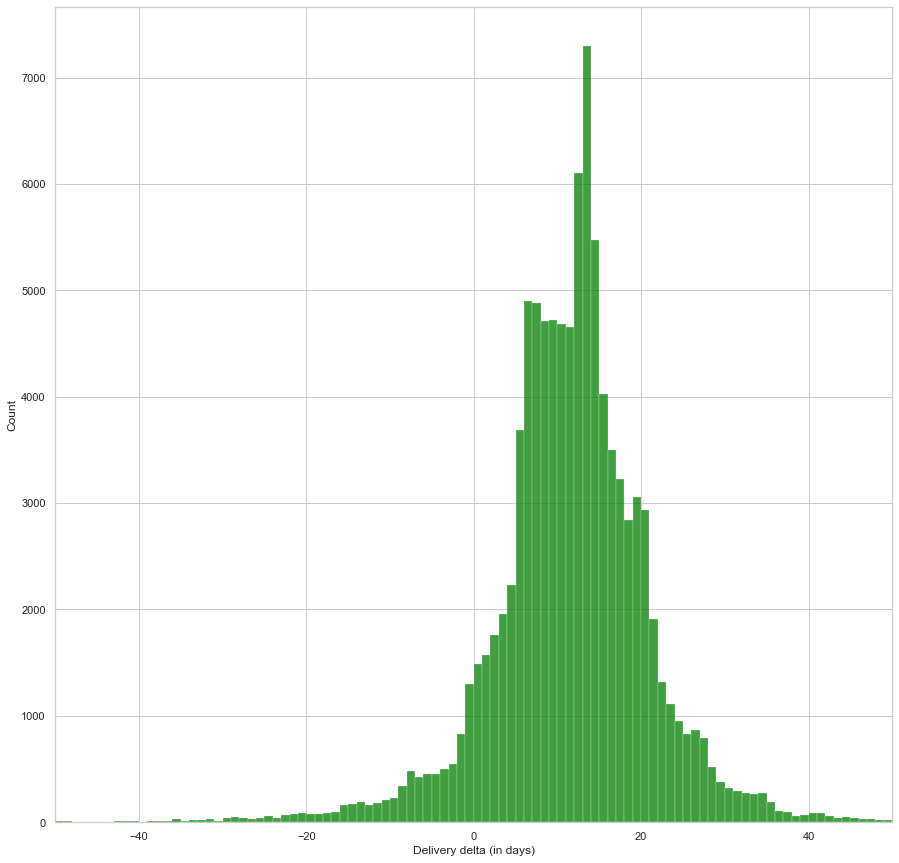

In [72]:
plt.figure(figsize = (15, 15))
sns.set_theme(style = "whitegrid", palette = None)
ax = sns.histplot(data= df_main, x = 'delivery_delay_delta_days', stat="count", kde=False, binwidth=1, color = 'green')
ax.set(xlim = (-50,50))

ax.set_xlabel('Delivery delta (in days)')
plt.show()

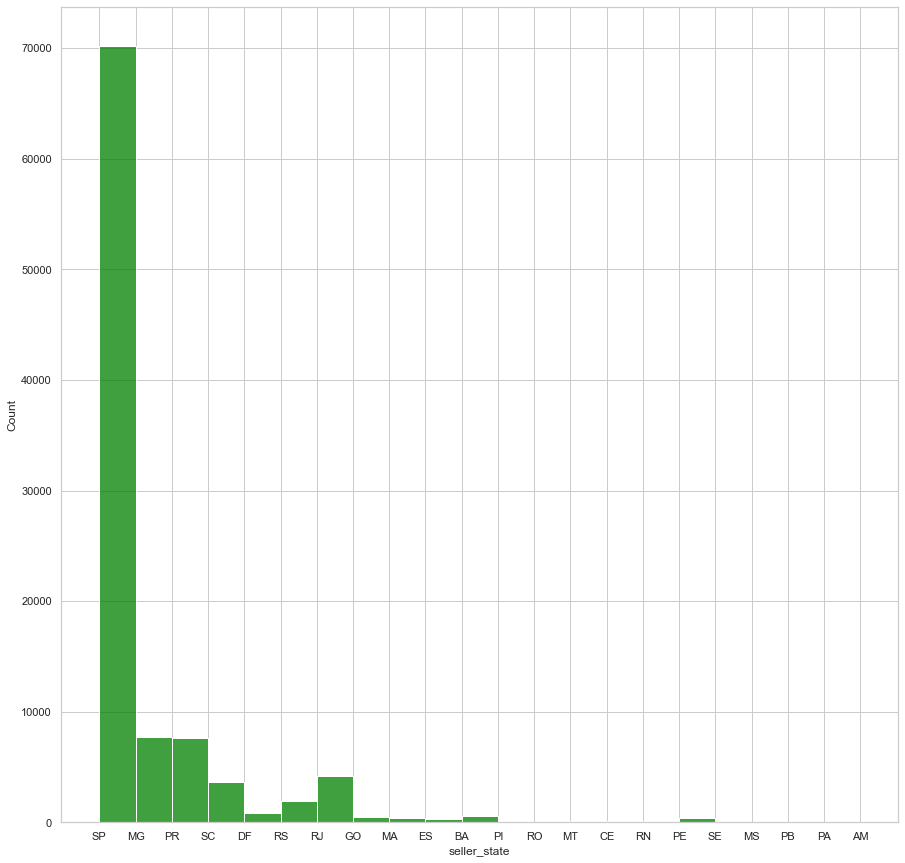

In [73]:
plt.figure(figsize = (15, 15))
sns.set_theme(style="whitegrid", palette=None)
ax = sns.histplot(data= df_main, x = 'seller_state', stat = 'count', discrete = False, binwidth = 1, color = 'green')
ax.set_xlabel('seller_state')
plt.show()

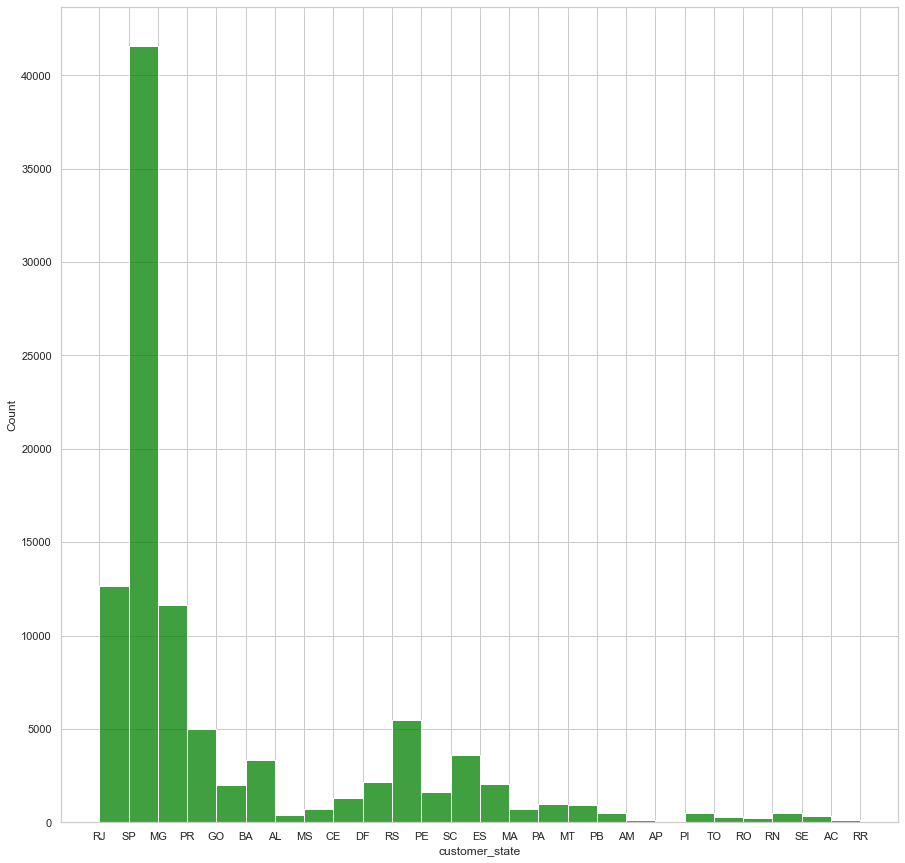

In [74]:
plt.figure(figsize = (15, 15))
sns.set_theme(style="whitegrid", palette=None)
ax = sns.histplot(data= df_main, x = 'customer_state', stat = 'count', discrete = False, binwidth = 1, color = 'green')
ax.set_xlabel('customer_state')
plt.show()

## 2. Vizualize relationship between reviews and delays

<AxesSubplot:xlabel='delivery_delay_delta_days', ylabel='review_score'>

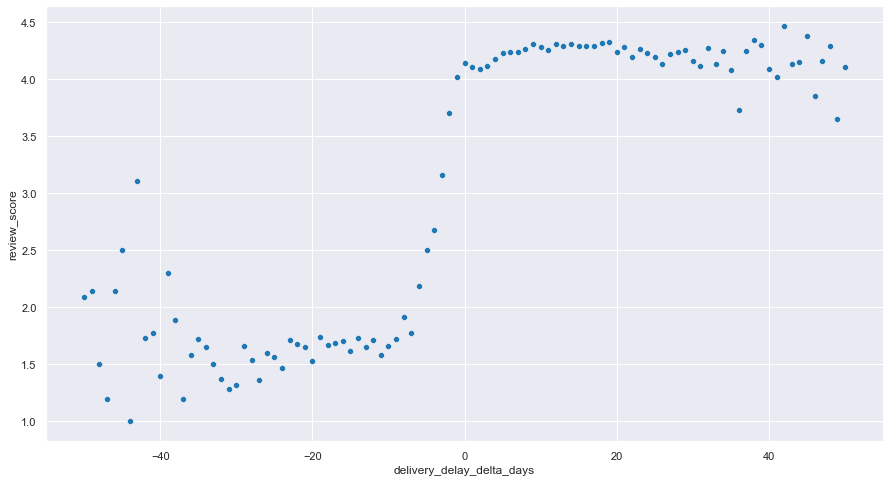

In [75]:
df_reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
df_reviews_merged = df_reviews.merge(df_main,on="order_id", how="right")
reviews_dealay = df_reviews_merged.groupby("delivery_delay_delta_days").agg({"review_score":"mean"}).reset_index()

reviews_dealay=reviews_dealay[(reviews_dealay["delivery_delay_delta_days"]<=50) &  (reviews_dealay["delivery_delay_delta_days"]>=-50)]

plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.scatterplot(data=reviews_dealay, x= "delivery_delay_delta_days", y="review_score")
#plt.savefig("delay_reviews.png")